# The Sustainability of Countries' Development Over Time 📝

<!-- ![Banner](./assets/banner.jpeg) -->

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

I want to understand how the development of a country affects environmental sustainability.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

1) Is the carbon footprint of a country related to its development and GDP?
2) How have these trends differed over time?

First, I would like to confirm that the development of a country and its GDP are correlated with its overall carbon emission levels.
Then, I would like to view these trends over time and determine whether development nowadays is more or less sustainable than it was in the past.

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

If I can establish the trend between the development of a country and its total carbon emissions, particularly over time, we can better understand how development can occur in a more sustainable way.

I predict that 1) the total carbon emissions of a country will increase as its GDP increases, and 2) countries that are developing now (in the 21st Century) will have higher total carbon emissions than countries that developed in the 20th Century.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

I have identified the following datasets that I will use:

- [ONU Sustainability of Countries Development](https://www.kaggle.com/datasets/vittoriogiatti/unsdg-united-nations-sustainable-development-group)
- [Wikipedia - Countries by HDI](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index)
- [CO2 Emissions by Country (per capita)](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC)
- [Annual GDP % Growth by Country](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG)

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

First, I will aggregate the GDP, CO2 emissions, and HDI data by year and country.
I will assess the relationships between those variables in general.

Then, I will assess the relationship between the three variables over time. I will also create visualizations that show these relationships (likely line graphs and some maps).

Specifically, I will compare countries that developed in the 20th Century (like North America, Western Europe, Australia/NZ, Japan, etc) compared to those that have developed or are still developing in the 21st Century (like China, India, Brazil, etc).

In [187]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests as req
import bs4

import sklearn.base as skb
import sklearn.impute as ski
import sklearn.model_selection as skm
import sklearn.linear_model as skl
import sklearn.pipeline as skp
import sklearn.preprocessing as skpr


In [188]:
# establish color map and palette
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

In [189]:
# https://data.worldbank.org/indicator/SP.POP.TOTL
pop_df = pd.read_csv('data/population.csv', skiprows=4, index_col="Country Code")
# https://data.worldbank.org/indicator/NY.GDP.MKTP.KD
gdp_df = pd.read_csv('data/GDP_2015USD.csv', skiprows=4, index_col="Country Code")
# https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG
gdp_growth_df = pd.read_csv('data/GDP_growth.csv', skiprows=4, index_col="Country Code")
# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
emissions_pc_df = pd.read_csv('data/CO2_emissions_percapita.csv', skiprows=4, index_col="Country Code")
# https://data.worldbank.org/indicator/EN.ATM.CO2E.KT
emissions_df = pd.read_csv('data/CO2_emissions_total.csv', skiprows=4, index_col="Country Code")

# https://data.worldbank.org/indicator/SP.POP.TOTL
hdi_df = pd.read_csv('data/HDI.csv', index_col="Code")

We will scrape Wikipedia to get a list of countries by their 3-letter country code (ISO 3166-1 alpha-3).
We will use this list to filter the data from the other datasets.

In [190]:
url = "https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes"
response = req.get(url)
soup = bs4.BeautifulSoup(response.text, "html.parser")
country_codes = []
for a in soup.findAll('a', href=True):
    if a['href'].startswith('/wiki/ISO_3166-1_alpha-3') and len(a.text) == 3:
        country_codes.append(a.text)

In [191]:
# filter to only include recognized countries with 3 letter codes

countries_gdp_df = gdp_df[gdp_df.index.isin(country_codes)]
countries_gdp_growth_df = gdp_growth_df[gdp_growth_df.index.isin(country_codes)]
countries_emissions_pc_df = emissions_pc_df[emissions_pc_df.index.isin(country_codes)]
countries_emissions_df = emissions_df[emissions_df.index.isin(country_codes)]

display(countries_gdp_df.shape)
display(countries_gdp_growth_df.shape)
display(countries_emissions_pc_df.shape)
display(countries_emissions_df.shape)
display(countries_gdp_growth_df.sample(10))
display(countries_emissions_df.sample(10))

(215, 66)

(215, 66)

(215, 66)

(215, 66)

Country Name         Indicator Name   
Country Code                                                    
SEN                            Senegal  GDP growth (annual %)  \
GAB                              Gabon  GDP growth (annual %)   
SVK                    Slovak Republic  GDP growth (annual %)   
NZL                        New Zealand  GDP growth (annual %)   
HTI                              Haiti  GDP growth (annual %)   
IND                              India  GDP growth (annual %)   
MLI                               Mali  GDP growth (annual %)   
TUN                            Tunisia  GDP growth (annual %)   
BFA                       Burkina Faso  GDP growth (annual %)   
MNP           Northern Mariana Islands  GDP growth (annual %)   

                 Indicator Code  1960       1961      1962      1963   
Country Code                                                           
SEN           NY.GDP.MKTP.KD.ZG   NaN   2.993448 -0.136235  1.864479  \
GAB           NY.GDP.MKTP.KD.ZG   NaN  14.766843  7.449212  6.092435   
SVK           NY.GDP.MKTP.KD.ZG   NaN        NaN       NaN       NaN   
NZL           NY.GDP.MKTP.KD.ZG   NaN        NaN       NaN       NaN   
HTI           NY.GDP.MKTP.KD.ZG   NaN  -2.931980  7.887576 -1.892793   
IND           NY.GDP.MKTP.KD.ZG   NaN   3.722743  2.931128  5.994353   
MLI           NY.GDP.MKTP.KD.ZG   NaN        NaN       NaN       NaN   
TUN           NY.GDP.MKTP.KD.ZG   NaN        NaN       NaN       NaN   
BFA           NY.GDP.MKTP.KD.ZG   NaN   4.043928  6.128799 -1.268016   
MNP           NY.GDP.MKTP.KD.ZG   NaN        NaN       NaN       NaN   

                  1964      1965      1966  ...      2013      2014      2015   
Country Code                                ...                                 
SEN           3.883927  1.332189  2.876761  ...  2.412385  6.224074  6.367044  \
GAB           4.554454  8.333336  4.508005  ...  5.638699  4.314964  3.878899   
SVK                NaN       NaN       NaN  ...  0.632740  2.697190  5.167182   
NZL                NaN       NaN       NaN  ...  2.695417  3.815428  3.744332   
HTI          -1.647357  2.161798 -0.575787  ...  4.324784  1.722566  2.562509   
IND           7.452950 -2.635770 -0.055329  ...  6.386106  7.410228  7.996254   
MLI                NaN       NaN       NaN  ...  2.295068  7.084684  6.171800   
TUN                NaN       NaN  3.454868  ...  2.429931  3.090328  0.967497   
BFA           2.282819  3.764545  0.537613  ...  5.792585  4.326846  3.921229   
MNP                NaN       NaN       NaN  ...  2.680965  4.177546  3.383459   

                   2016       2017       2018       2019      2020      2021   
Country Code                                                                   
SEN            6.369684   7.393737   6.209241   4.613628  1.325505  6.064496  \
GAB            2.091442   0.472642   0.837917   3.920809 -1.837761  1.462287   
SVK            1.943951   2.938069   4.030390   2.519693 -3.374682  3.014303   
NZL            3.767448   3.578278   3.359220   2.192477 -1.252665  3.714010   
HTI            1.812468   2.510271   1.667811  -1.684595 -3.343373 -1.798240   
IND            8.256306   6.795383   6.453851   3.737919 -6.596081  8.681229   
MLI            5.852299   5.305456   4.746484   4.756161 -1.235450  3.052614   
TUN            1.118015   2.244345   2.590367   1.503428 -8.621135  4.322776   
BFA            5.957977   6.203489   6.604569   5.688115  1.930325  6.906342   
MNP           29.212121  23.170732 -19.345011 -11.142587       NaN       NaN   

              Unnamed: 66  
Country Code               
SEN                   NaN  
GAB                   NaN  
SVK                   NaN  
NZL                   NaN  
HTI                   NaN  
IND                   NaN  
MLI                   NaN  
TUN                   NaN  
BFA                   NaN  
MNP                   NaN  

[10 rows x 66 columns]

Country Name      Indicator Name  Indicator Code  1960  1961   
Country Code                                                                 
SLV            El Salvador  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN  \
MLT                  Malta  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
MNG               Mongolia  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
NGA                Nigeria  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
SLE           Sierra Leone  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
LUX             Luxembourg  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
SAU           Saudi Arabia  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
ESP                  Spain  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
ERI                Eritrea  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   
CRI             Costa Rica  CO2 emissions (kt)  EN.ATM.CO2E.KT   NaN   NaN   

              1962  1963  1964  1965  1966  ...           2013           2014   
Country Code                                ...                                 
SLV            NaN   NaN   NaN   NaN   NaN  ...    6460.000038    6590.000153  \
MLT            NaN   NaN   NaN   NaN   NaN  ...    2369.999886    2359.999895   
MNG            NaN   NaN   NaN   NaN   NaN  ...   18379.999161   18120.000839   
NGA            NaN   NaN   NaN   NaN   NaN  ...  108129.997253  114830.001831   
SLE            NaN   NaN   NaN   NaN   NaN  ...    1039.999962    1149.999976   
LUX            NaN   NaN   NaN   NaN   NaN  ...   10149.999619    9649.999619   
SAU            NaN   NaN   NaN   NaN   NaN  ...  503209.991455  540520.019531   
ESP            NaN   NaN   NaN   NaN   NaN  ...  242809.997559  240960.006714   
ERI            NaN   NaN   NaN   NaN   NaN  ...     639.999986     649.999976   
CRI            NaN   NaN   NaN   NaN   NaN  ...    7780.000210    7829.999924   

                       2015           2016           2017           2018   
Country Code                                                               
SLV             7000.000000    7170.000076    6380.000114    6809.999943  \
MLT             1659.999967    1350.000024    1519.999981    1549.999952   
MNG            17299.999237   18170.000076   19579.999924   21549.999237   
NGA           107760.002136  110830.001831  108500.000000  109889.999390   
SLE              910.000026     930.000007     939.999998     860.000014   
LUX             9130.000114    8850.000381    9000.000000    9319.999695   
SAU           565190.002441  561229.980469  545070.007324  521260.009766   
ESP           256279.998779  247029.998779  263450.012207  257040.008545   
ERI              649.999976     660.000026     720.000029     850.000024   
CRI             7539.999962    8079.999924    8260.000229    8369.999886   

                       2019  2020  2021  Unnamed: 66  
Country Code                                          
SLV             7800.000191   NaN   NaN          NaN  
MLT             1659.999967   NaN   NaN          NaN  
MNG            23069.999695   NaN   NaN          NaN  
NGA           115279.998779   NaN   NaN          NaN  
SLE              899.999976   NaN   NaN          NaN  
LUX             9489.999771   NaN   NaN          NaN  
SAU           523780.029297   NaN   NaN          NaN  
ESP           239979.995728   NaN   NaN          NaN  
ERI              879.999995   NaN   NaN          NaN  
CRI             8239.999771   NaN   NaN          NaN  

[10 rows x 66 columns]

## Great, now we have our 215 countries from each dataset 🎉

But, our datasets differ in when they start tracking data for each country.

- For GDP, The earliest data is from 1961, but it only includes 92 countries. The world geography was quite different then (the USSR was still a thing, for example). By 2021, we have about 200 countries.
- For CO2 emissions, the earliest data is from 1990, but it only includes 92 countries. It goes up to 2019, where we have 191 countries.

So, our datasets agree about which countries exist, but we don't necessarily have data for all of them for the same time period.

I think we will be able to get a good idea of the trends by just looking at the data from 1990-2019.

# Exploratory Data Analysis
### Let's look at worldwide trends first.

In [192]:
world_gdp_growth = gdp_growth_df[gdp_growth_df['Country Name'] == 'World']
world_emissions_pc = emissions_pc_df[emissions_pc_df['Country Name'] == 'World']
world_emissions = emissions_df[emissions_df['Country Name'] == 'World']

In [193]:
def reshape_data_by_year(df):
    df.reset_index(inplace=True)
    reshaped_df = pd.melt(df, id_vars=['Country Name', 'Country Code'], var_name="year")
    pivoted_df = reshaped_df.pivot(index='year', columns=['Country Name', 'Country Code'], values='value')
    return pivoted_df

# function to create graphs of longitudinal data
def plot_data_by_year(df, start_year="1990", end_year="2019", ax=None, figsize=None):
    reshaped_df = reshape_data_by_year(df)
    reshaped_df = reshaped_df.loc[start_year:end_year, :]
    ax = reshaped_df.plot(figsize=figsize, ax=ax, xlabel='')
    ticks = list(ax.get_xticks())
    labels = list(ax.get_xticklabels())
    if end_year=="2019" and ticks[-1]%5==0:
        ticks = ticks[1:-1]
        ticks[-1] -= 1
        ax.set_xticks(ticks)
        labels = labels[1:-1]
        labels[-1].set_text('2019')
        ax.set_xticklabels(labels)
    return ax

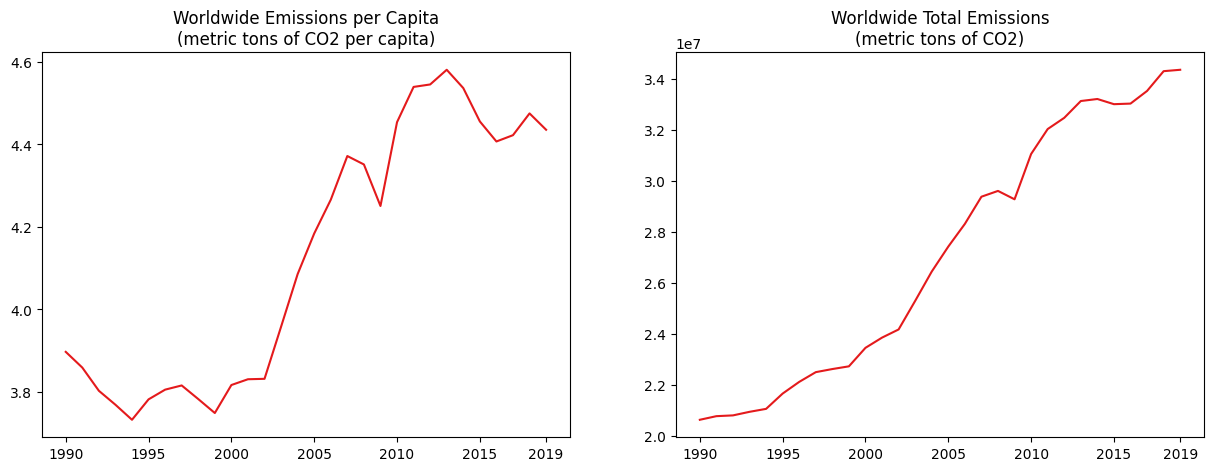

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_data_by_year(world_emissions_pc, ax=ax1)
ax1.set_title("Worldwide Emissions per Capita\n(metric tons of CO2 per capita)")
ax1.legend().set_visible(False)

plot_data_by_year(world_emissions, ax=ax2)
ax2.set_title("Worldwide Total Emissions\n(metric tons of CO2)")
ax2.legend().set_visible(False)

plt.show()

The graph of the left may make it seem that the situation is improving, but these are only per capita emissions. The world population is rapidly increasing, so the total emissions are still growing.

Let's break it down per country. Since there are so many countries, we'll staart by displaying the top emitters.

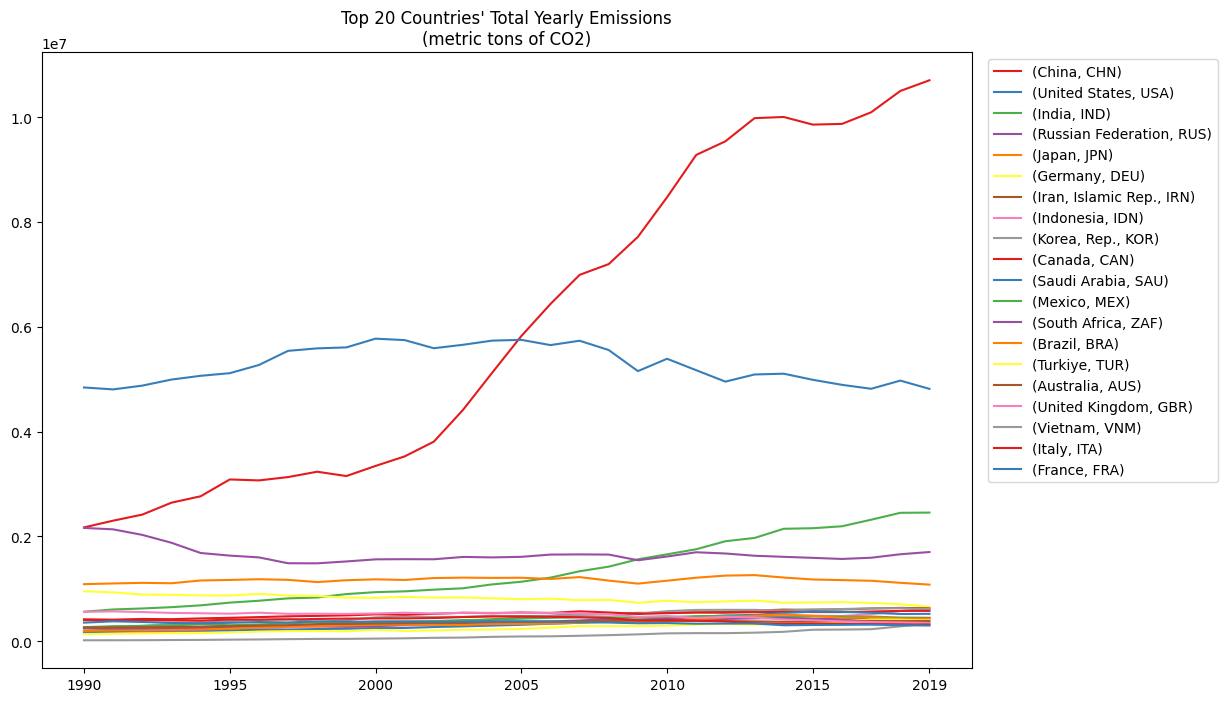

In [195]:
TWENTY = 20

emissions_df_top_TWENTY =  countries_emissions_df.nlargest(TWENTY, '2019')
ax = plot_data_by_year(emissions_df_top_TWENTY, figsize=(12,8))
ax.set_title(f"Top {TWENTY} Countries' Total Yearly Emissions\n(metric tons of CO2)")
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left') # legend outside plot
plt.show()

It's clear that China's emissions grew rapidly over the last 30 years, blowing past the US around 2005.
Having developed already, the US is decreasing emissions, but China and India are still developing and their emissions are still growing.

It would be interesting to see how these top emitting countries compare to the rest of the world. I would expect that the top countries are responsible for a large percentage of the world's emissions.

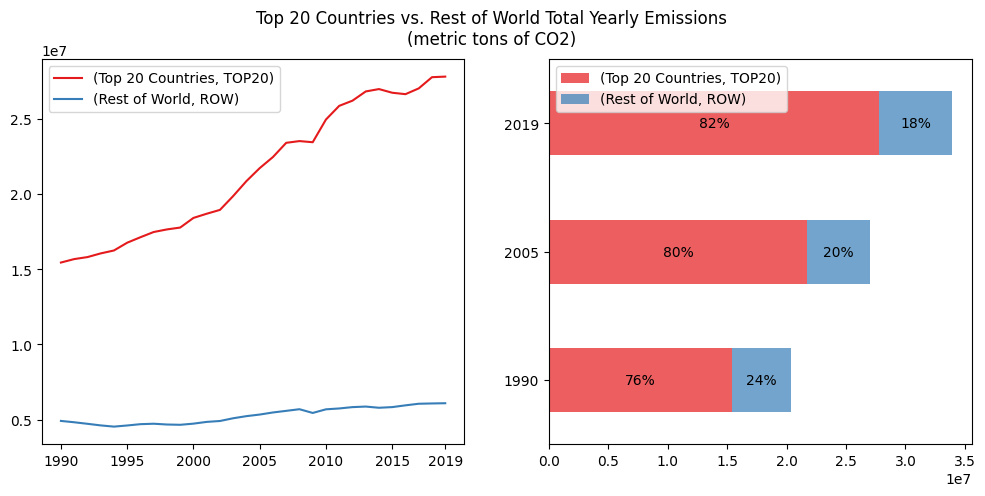

In [196]:
# sum total yearly emissions for top TWENTY countries and rest of world
sums = lambda df: df.loc[:, '1990':'2019'].sum(axis=0)
top_TWENTY = countries_emissions_df.nlargest(TWENTY, '2019')
others = countries_emissions_df.drop(top_TWENTY.index)
top_TWENTY_vs_world_df = pd.DataFrame([[f'Top {TWENTY} Countries', f'TOP{TWENTY}'] + sums(top_TWENTY).tolist(),
                                           ['Rest of World', 'ROW'] + sums(others).tolist()],
                                      columns=['Country Name', 'Country Code'] + sums(top_TWENTY).index.tolist())

# create line plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_data_by_year(top_TWENTY_vs_world_df, ax=ax1)
fig.suptitle(f"Top {TWENTY} Countries vs. Rest of World Total Yearly Emissions\n(metric tons of CO2)")
ax1.legend().set_title('')

# create stacked bar plot
barplot_years = ['1990', '2005', '2019']
top_TWENTY_vs_world = reshape_data_by_year(top_TWENTY_vs_world_df).loc[barplot_years, :]
top_TWENTY_vs_world.plot(kind='barh', ax=ax2, alpha=0.7, stacked=True)
ax2.set_ylabel('')
ax2.legend().set_title('')

# add percentages to bars
for i, p in enumerate(ax2.patches):
    year = barplot_years[i % 3]
    year_total = top_TWENTY_vs_world_df[year].sum()
    width = p.get_width()
    ax2.text(width / 2 + (0, top_TWENTY_vs_world.loc[year, 'Top 20 Countries'].iloc[0])[i>2], p.get_y() + p.get_height() / 2,
             '{:1.0%}'.format(width / year_total),
             ha='center', va='center')
    
plt.show()

#### The top 20 countries are responsible for about 80% of the world's emissions.
This seems like an occurence of the Pareto Principle, which is found in many areas of life including economics, so it makes sense that it would be found for emissions as well.

<div style="height: 400px; width: 800px">
    <iframe src="https://en.wikipedia.org/wiki/Pareto_principle?useskin=minerva#content"
        style="position:absolute; zoom: 1.25; transform: scale(.8); transform-origin: 0 0;"
        scrolling="yes" height="400px" width="800px">
    </iframe>
</div>

### Emissions by Demographic Dividend Stage

Demographic dividend is the period of time when a country's working-age population is growing faster than its overall population.
The WorldBank databases classify countries into 4 stages based on their development status and include an aggregate measure of emissions for all countries in each of the 4 stages.

The 4 stages are:
- 'PRE': Pre-dividend countries are mostly low-income countries, lagging in key human development indicators and with current fertility levels above four births per woman. They face very rapid population growth.
- 'EAR': Early-dividend countries are mostly lower-middle-income countries further along the fertility transition. Fertility rates have fallen below four births per woman and the working-age share of the population is likely rising considerably.
- 'LTE': Late-dividend countries are mostly upper middle-income countries. Fertility rates are typically above replacement levels of 2.1 births per woman but continue to decline with shrinking working-age shares and rapid aging.
- 'PST': Post-dividend countries are mostly high-income countries where fertility has transitioned below replacement levels.

It is difficult to discern which specific countries are classified by WorldBank as 'PRE', 'EAR', 'LTE', and 'PST' dividend countries. However, we can be reasonably sure that "developed" countries are in the 'PST' stage, and "developing" countries are in the 'EAR' or 'LTE' stage.
Most likely, 'POST' includes countries like the US, Canada, Australia, Japan, and Western Europe, while 'EAR' and 'LTE' include countries like China, India, Brazil, and other developing countries.

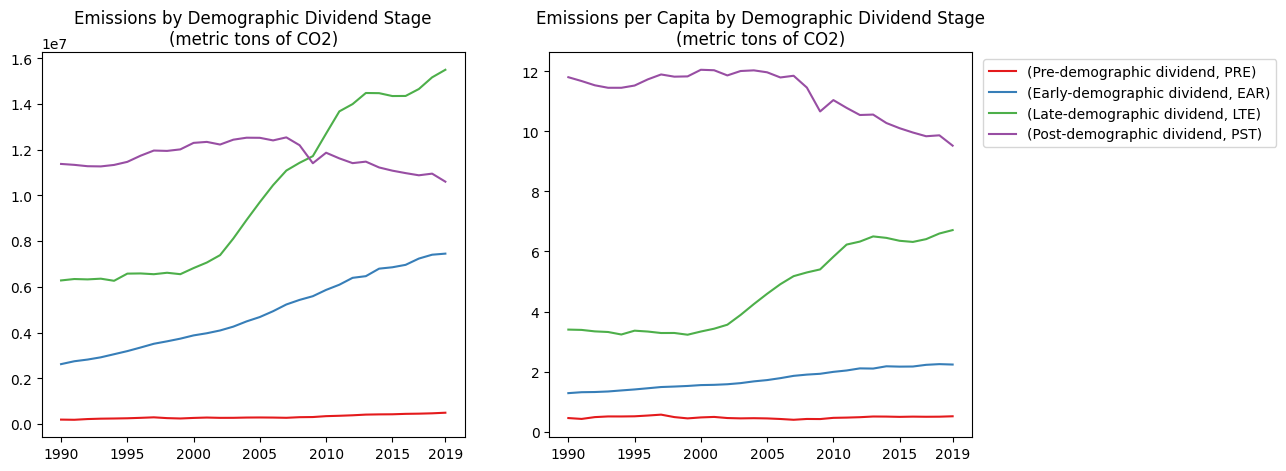

In [197]:
demographic_dividend_stages = ['PRE', 'EAR', 'LTE', 'PST']

emissions_by_demographic_dividend_stage = emissions_df[
    emissions_df.index.isin(demographic_dividend_stages)
].reindex(demographic_dividend_stages)

emissions_pc_by_demographic_dividend_stage = emissions_pc_df[
    emissions_pc_df.index.isin(demographic_dividend_stages)
].reindex(demographic_dividend_stages)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_data_by_year(emissions_by_demographic_dividend_stage, ax=ax1)
ax1.set_title("Emissions by Demographic Dividend Stage\n(metric tons of CO2)")
ax1.legend().set_visible(False)

plot_data_by_year(emissions_pc_by_demographic_dividend_stage, ax=ax2)
ax2.set_title("Emissions per Capita by Demographic Dividend Stage\n(metric tons of CO2)")
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left') # legend outside plot

plt.show()

We can see that globally, late-dividend (developing) countries produce the highest overall emissions -- more than post-dividend countries (developed).
The developed world is decreasing its emissions, while the developing world is increasing its emissions.

The developed world has greater emissions per capita than the developing world.
The good news is that this is going down. The bad news is that the damage has already been done when those countries were developing in the 20th Century.

# Correlation Analysis

## To do a proper correlation analysis, we should aggregate the data by year and country.

In [198]:
def explode_by_year(df, measure_name):
    reshaped_df = pd.melt(df, id_vars=['country', 'iso-3'], var_name="year", value_name=measure_name)
    reshaped_df = reshaped_df[
        reshaped_df['year'].str.isnumeric() & reshaped_df[measure_name].notna()
    ]
    reshaped_df['year'] = reshaped_df['year'].astype(int)
    reshaped_df[measure_name] = reshaped_df[measure_name].astype(float)
    return reshaped_df

dataframes = {
    'emissions': emissions_df,
    'gdp': gdp_df,
    'gdp_growth': gdp_growth_df,
    'pop': pop_df,
    'hdi': hdi_df,
}

agg_df = None
for measure_name, df in dataframes.items():
    df = df.reset_index()
    df.columns = df.columns.str.lower()
    renames = {}
    if 'country code' in df:
        renames['country code'] = 'iso-3'
    if 'code' in df:
        renames['code'] = 'iso-3'
    if 'country name' in df:
        renames['country name'] = 'country'
    if 'entity' in df:
        renames['entity'] = 'country'

    if renames:
        df = df.rename(columns=renames)

    if 'year' not in df:
        df = explode_by_year(df, measure_name)
    else:
        df['year'] = df['year'].astype(int)
        df = df.rename(columns={df.columns[-1]: measure_name})


    if agg_df is None:
        agg_df = df
    else:
        agg_df = agg_df.merge(df, on=['year', 'country', 'iso-3'])

agg_df.sort_values(by=['year', 'country'], inplace=True)

# create new features for emissions per capita and GDP per capita
agg_df['emissions_pc'] = agg_df['emissions'] / agg_df['pop']
agg_df['gdp_pc'] = agg_df['gdp'] / agg_df['pop']

# filter out continents, regions, and other non-country data
countries_agg_df = agg_df[agg_df['iso-3'].isin(country_codes)]

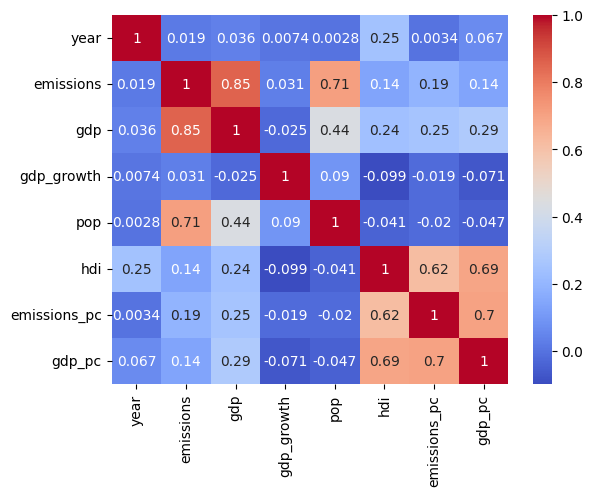

In [199]:
# columns from 'year' onward are numerical and will be used for correlation analysis
numerical_cols = countries_agg_df.loc[:, 'year':].columns

corrs = countries_agg_df[numerical_cols].corr()
sns.heatmap(corrs, annot=True, cmap='coolwarm')
plt.show()

In [200]:
ranged_countries_agg_df = countries_agg_df.query('1990 <= year <= 2019')

fig = px.scatter(countries_agg_df.query('1990 <= year <= 2019'),
                    x="gdp", y="emissions",
                    animation_frame="year", animation_group="iso-3",
                    hover_name="country", labels={'year': 'Year', 'gdp': 'GDP', 'emissions': 'Emissions'},
                    color="gdp_pc", size=(ranged_countries_agg_df['pop'].fillna(0)+225555555), size_max=10,
                    color_continuous_scale=px.colors.sequential.Bluered,
                    log_x=True, log_y=True, opacity=0.7,
                    width=800, height=600)
# change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 400
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 400

fig.show()

In [201]:
year_idx = 0
# emissions_idx = 4
gdp_idx = 1
gdp_growth_idx = 2
pop_idx = 3
hdi_idx = 4

class AttributesAdder(skb.BaseEstimator, skb.TransformerMixin):
    def __init__(self, log_gdp=True, gdp_pc=True, emissions_pc=True):
        self.gdp_pc = gdp_pc
        self.emissions_pc = emissions_pc
        self.log_gdp = log_gdp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        retVal = np.c_[X]
        if self.log_gdp:
            log_gdp = np.log(X[:, gdp_idx])
            retVal = np.c_[retVal, log_gdp]
        if self.gdp_pc:
            gdp_pc = X[:, gdp_idx] / X[:, pop_idx]
            retVal = np.c_[retVal, gdp_pc]
        if self.emissions_pc:
            emissions_pc = X[:, emissions_idx] / X[:, pop_idx]
            retVal = np.c_[retVal, emissions_pc]
        return retVal

scaler = skpr.StandardScaler()

pipeline = skp.Pipeline([
    ('impute', ski.SimpleImputer(strategy='median')),
    ('attribute-adder', AttributesAdder(log_gdp=False, gdp_pc=False, emissions_pc=False)),
    ('scaling', scaler)
])

countries_X = countries_agg_df.drop('emissions', axis=1)[['gdp', 'year']].copy()
countries_y = countries_agg_df['emissions'].copy()

cleaned_X = pipeline.fit_transform(countries_X)

poly = skpr.PolynomialFeatures(degree=5, include_bias=False)
poly_X = poly.fit_transform(cleaned_X)
new_cols = countries_X.columns.tolist()
X_features = pd.DataFrame(poly_X, index=countries_X.index)
X_features.columns = new_cols + X_features.columns[len(new_cols):].astype(str).tolist()

X_features.head()

gdp     year         2         3        4         5         6   
0  -0.240262 -1.86572  0.057726  0.448262  3.48091 -0.013869 -0.107700  \
29 -0.188681 -1.86572  0.035600  0.352025  3.48091 -0.006717 -0.066420   
2  -0.061532 -1.86572  0.003786  0.114801  3.48091 -0.000233 -0.007064   
3   0.188864 -1.86572  0.035670 -0.352367  3.48091  0.006737 -0.066550   
4  -0.078811 -1.86572  0.006211  0.147039  3.48091 -0.000490 -0.011588   

           7         8         9        10        11        12         13   
0  -0.836331 -6.494402  0.003332  0.025876  0.200939  1.560360  12.116735  \
29 -0.656780 -6.494402  0.001267  0.012532  0.123922  1.225367  12.116735   
2  -0.214187 -6.494402  0.000014  0.000435  0.013179  0.399613  12.116735   
3   0.657419 -6.494402  0.001272 -0.012569  0.124163 -1.226559  12.116735   
4  -0.274334 -6.494402  0.000039  0.000913  0.021621  0.511831  12.116735   

              14        15        16        17        18         19  
0  -8.006230e-04 -0.006217 -0.048278 -0.374896 -2.911194 -22.606431  
29 -2.391309e-04 -0.002365 -0.023382 -0.231203 -2.286192 -22.606431  
2  -8.820691e-07 -0.000027 -0.000811 -0.024589 -0.745566 -22.606431  
3   2.402961e-04 -0.002374  0.023450 -0.231653  2.288416 -22.606431  
4  -3.040449e-06 -0.000072 -0.001704 -0.040338 -0.954934 -22.606431

In [202]:
lr = skl.LinearRegression()
lr.fit(X_features, countries_y)

x_name = 'gdp'
y_name = 'year'
z_name = 'emissions'

plot_df = X_features.copy()
plot_df['emissions'] = countries_y.values

fig = px.scatter_3d(plot_df, x=x_name, y=y_name, z=z_name,
                    color='emissions', opacity=0.7,
                    log_x=True, log_y=False, log_z=True)

x = np.linspace(plot_df[x_name].min(), plot_df[x_name].max(), 100)
y = np.linspace(plot_df[y_name].min(), plot_df[y_name].max()*2, 100)
x_surf, y_surf = np.meshgrid(x, y)

X_surface = pd.DataFrame({
    x_name: x_surf.ravel(),
    y_name: y_surf.ravel()
})

for degree in [1, 2, 3, 4]:
    model = skp.make_pipeline(
        skpr.PolynomialFeatures(degree=degree),
        skl.LinearRegression()
    )
    model.fit(plot_df[[x_name, y_name]], plot_df[z_name])
    z2_hat = model.predict(X_surface)
    fig.add_traces(
        go.Surface(
            x=x_surf,
            y=y_surf,
            z=z2_hat.reshape(x_surf.shape),
            opacity=0.5,
            colorscale='Reds'
        )
    )

fig.show()

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [203]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 20767 bytes to source.py
